# Probability distributions

### 2.1.1 Probabilities and long-run relative frequencies

Having a 0.20 of probability for rain tomorrow we could imagine outcomes of the days (0, 1, ..., 9) where 0 and 1 denote rain. Using software:

In [6]:
import numpy as np
days = 9
randomlist = list(range(days+1))
np.random.choice(randomlist, replace=False)

9

Again, for a week.

In [8]:
np.random.choice(randomlist, 7, replace=True)

array([0, 5, 9, 3, 6, 7, 3])

We can imagine each outcome like the result for flipping a coin (where head represents rain), and the chance for get head is about 0.20 (0 or 1). Whe can obtain the same result for simulating a **binomial distribution**:

In [10]:
np.random.binomial(7, 0.2, size=1) # 1 simulation for 7 flips

array([0])

In [11]:
n, p = 1, 0.2
np.random.binomial(n, p, size=7) # 7 simulations of 1 flip

array([0, 0, 0, 0, 0, 0, 0])

With $n\to\infty$, probability converges to 0.20:

In [13]:
for i in [10, 100, 1000, 10000, 100000, 1000000]:
    outcome = np.random.binomial(i, 0.2, size=1)
    print(f'Exits: {outcome}, proportion: {outcome.sum()/i}')

Exits: [2], proportion: 0.2
Exits: [13], proportion: 0.13
Exits: [204], proportion: 0.204
Exits: [2015], proportion: 0.2015
Exits: [20011], proportion: 0.20011
Exits: [199750], proportion: 0.19975


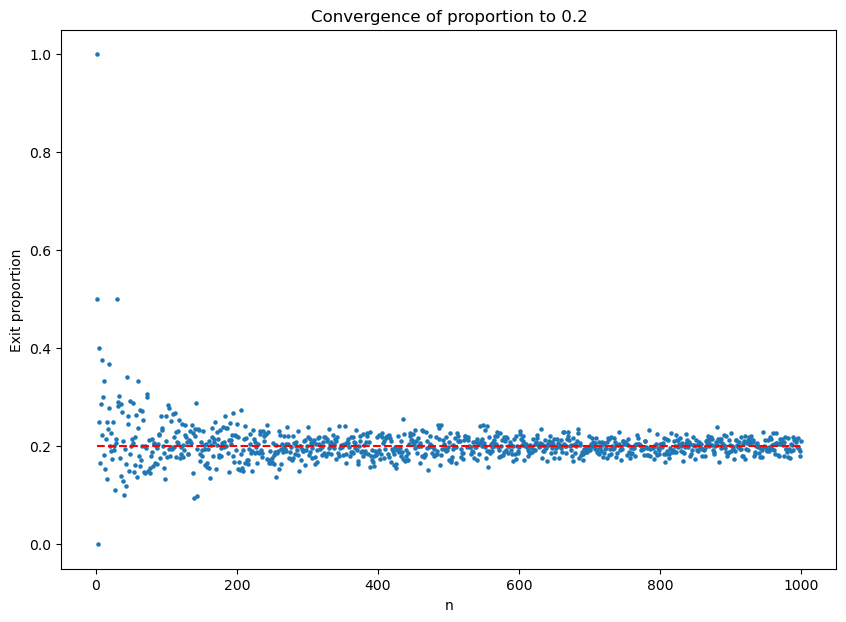

In [14]:
import matplotlib.pyplot as plt
n = 1000
simulations = range(1, n + 1)
outcomes = [np.random.binomial(i, 0.2, size=1) / i for i in simulations]
plt.figure(figsize=(10,7))
plt.scatter(simulations, outcomes, s=5)
plt.plot(simulations, [0.2] * n, '--', color='red')
plt.xlabel('n')
plt.ylabel('Exit proportion')
plt.title('Convergence of proportion to 0.2')
plt.show()

## 2.3 Expectations of random variables

### 2.3.1 Expected value and variability of discrete variables

In [17]:
from scipy.stats import binom

In [18]:
y = np.random.binomial(3, 0.5, size=10000000) # 1000000
y

array([2, 0, 2, ..., 2, 0, 1])

In [19]:
y.mean(), y.std()

(1.5002366, 0.8659068910803512)

### 2.3.2 Expected values and variability for continuous random variables

In [21]:
y = np.random.uniform(0, 100, size=10000000)
y

array([20.12101333, 71.07652574, 27.62001918, ..., 55.42645079,
       36.21179528, 66.69420377])

In [22]:
y.mean(), y.std()

(50.00890566920916, 28.869040304900526)

## 2.4 Discrete Probability Distributions

### 2.4.1 Binomial Distribution

La función masa de probabilidad (pmf) de una variable aleatoria discreta $Y$ dado $y$ casos de éxito en $n$ ensayos independientes, y con probabilidad de éxito $\pi$, $0\leq\pi\leq1$ está dada por:
$$f(y; n, \pi)=\binom{n}{y}(\pi)^y(1-\pi)^{n-y}, \quad y=0,1,\dots,n$$

Para la distribución de $f(y;12, 0.20)$:

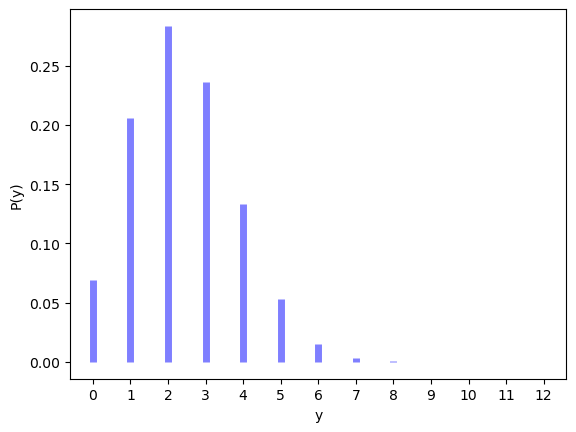

In [27]:
n, π = 12, 0.20
y = list(range(n + 1))
fig, ax = plt.subplots(1, 1)
ax.vlines(y, 0, binom.pmf(y, n, π), colors='b', lw=5, alpha=0.5)
plt.xlabel('y')
plt.ylabel('P(y)')
plt.xticks(np.arange(min(y),max(y)+1, 1.0))
plt.show()

In [28]:
list(binom.pmf(y, n, π))

[0.06871947673599996,
 0.20615843020800018,
 0.2834678415359999,
 0.2362232012799998,
 0.13287555071999996,
 0.05315022028800005,
 0.015502147583999999,
 0.003321888767999999,
 0.0005190451200000003,
 5.767167999999991e-05,
 4.325376e-06,
 1.9660800000000014e-07,
 4.096000000000002e-09]

In [29]:
mean, variance, skewnees = binom.stats(n, π, moments='mvs') # mvs for mean, variance and skewness
mean, variance, skewnees

(2.4000000000000004, 1.9200000000000004, 0.43301270189221924)

Para una encuesta con 3 ensayos y probabilidad de respuesta *sí* de 0.50:

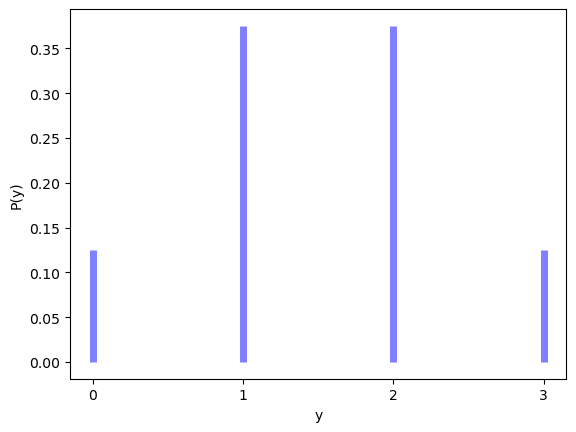

In [31]:
n, π = 3, 0.50
y = list(range(n + 1))
fig, ax = plt.subplots(1, 1)
ax.vlines(y, 0, binom.pmf(y, n, π), colors='b', lw=5, alpha=0.5)
plt.xlabel('y')
plt.ylabel('P(y)')
plt.xticks(np.arange(min(y),max(y)+1, 1.0))
plt.show()

## 2.5 Continous Probability Distribution

### 2.5.1 Normal Distribution

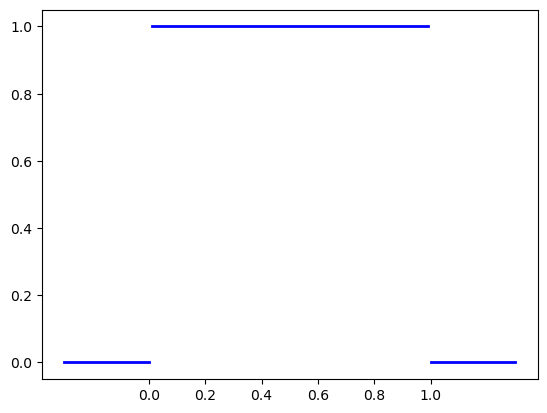

In [54]:
from scipy.stats import uniform

fig, ax = plt.subplots(1, 1)
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
rv = uniform()
ax.plot(x, rv.pdf(x), lw=2, color='blue')
plt.plot([-0.3, 0], [0, 0], lw=2, color='blue')
plt.plot([1, 1.3], [0, 0], lw=2, color='blue')
plt.xticks(np.arange(0, 1.2, 0.2))
plt.show()

In [70]:
uniform.rvs(0,100,1)

array([28.12465599])

### Example

In [73]:
from scipy.stats import norm
norm.cdf(70, 45, 15) - norm.cdf(50, 45, 15)

0.32165098790894897

In [79]:
norm.ppf(0.99)

2.3263478740408408

In [83]:
norm.cdf(550, 500, 100), norm.cdf(30, 18, 6)

(0.6914624612740131, 0.9772498680518208)